Processing image 1


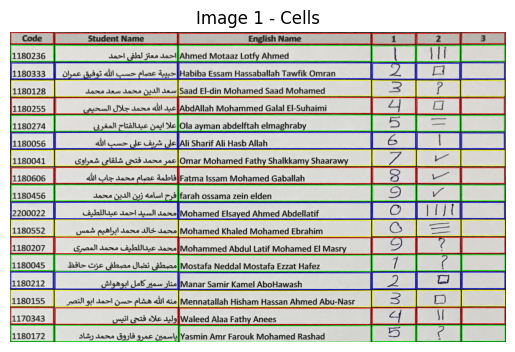

Row 1: ['Code', 'Student Name', 'English Name', '1', '2', '3']
Row 2: ['1180236', '', 'Ahmed Motaaz Lotfy Ahmed', '|', '|||', '']
Row 3: ['1180333', '', 'Habiba Essam Hassaballah Tawfik Omran', '2', '1', '']
Row 4: ['1180128', 'ae at mA \u200fدن\u200e Jl ls', 'Saad El-din Mohamed Saad Mohamed', '3', 'ig', '']
Row 5: ['1180255', 'عبد الله محمد جلال السحيى 2', '\u200eMohammed Galal El-Suhaimi\u200f طوالملطم', '', 'لا', '']
Row 6: ['1180274', 'علا ايمن عبدالفتاح المغربى |', 'Ola ayman abdelftah elmaghraby', '5', '—', '']
Row 7: ['1180056', 'على شردف على حسب الله ا 0', 'Ali Sharif Ali Hasb Allah', '&', '|', '“SESS']
Row 8: ['1180041', '', 'Omar Mohamed Fathy Shalkkamy Shaarawy', '70', '—', '']
Row 9: ['1180606', 'فاطمة عصام محمد جاب الله', 'Fatma !ssam Mohamed Gaballah', '2', 'al', 'ee']
Row 10: ['1180456', 'فرح اسامه زبن الدين محمد', 'farah ossama zein elden', '5', '2', 'eas']
Row 11: ['2200022', '', 'Mohamed Elsayed Ahmed Abdellatif', '0', 'bt}', '']
Row 12: ['1180552', '', 'Mohamed Khal

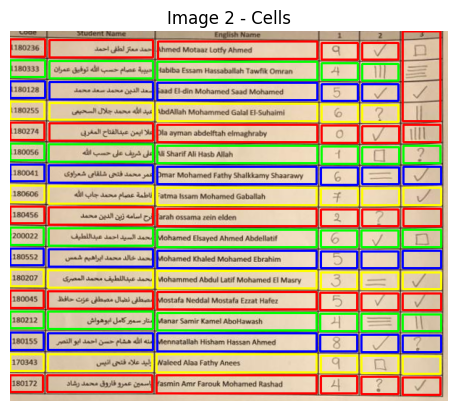

Row 1: ['1180236', 'a \u200fالطقى\u200e fa \u200fعمد\u200e', '\u200eMotear Lotly Ahmed\u200f لمحيل', '9', '3530', '']
Row 2: ['1190333', '\u200eae en\u200f حب قله الوفيق مرا', 'Habiba Essar bassaballah Tawi Onieaet', '4', 'Ul']
Row 3: ['1180128', 'عمد الذين مجحل سعد \u200eare\u200f', 'Sead \u200fالماع\u200e Mohamed Saad Mohamed', '5', 'vA']
Row 4: ['1180255,', 'عبد الله محمد جلال \u200epel\u200f', 'AbdAltah \u200fاحلده فعحجعاماية\u200e EE Sublet', '0', '2?']
Row 5: ['1607', 'AS Chas \u200fعلا امن\u200e', 'Dla aymnen abdelttah \u200fإظدة الوس له\u200e', '0', 'Vv', 'ql']
Row 6: ['1190086', 'على شريف على حصب الله', 'Al Shari All Hash Allah,', '1', 'a', '27']
Row 7: ['1180041', 'عمر محمد \u200epcb\u200f كلقاى \u200eBaha\u200f', 'Omar Mohamed Fathy \u200fبجحل اط\u200e Shazrawy', '6', '', '52']
Row 8: ['1180606', 'الطمة عصام محمد جاب الله', 'parma (scam Mohmed \u200fلجالسضية\u200e', '37', '0', '54']
Row 9: ['180456', 'رح اسامه زين \u200eaed\u200f محمد', 'farah \u200fمعدي\u200e rein \u200fمجا

In [6]:
import cv2 as cv
import pytesseract
from utils import *  # For show_images
from tableExtraction import *  # For extractTable

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def extract_text_from_cells(image, rows):
    """
    Given an image and table rows (list of cells), returns a nested list of text strings.
    Supports both Arabic and English.
    """
    extracted_text = []

    for i, row in enumerate(rows):
        row_text = []
        for j, (x, y, w, h) in enumerate(row):
            cell_img = image[y:y+h, x:x+w]
            
            # Preprocessing for better OCR
            gray = cv.cvtColor(cell_img, cv.COLOR_BGR2GRAY)
            _, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
            
            # Optional: invert for better Arabic recognition
            thresh = cv.bitwise_not(thresh)
            
            # OCR using both Arabic and English
            text = pytesseract.image_to_string(thresh, lang='ara+eng', config='--psm 7')
            text = text.strip().replace('\n', ' ')
            
            row_text.append(text)
        extracted_text.append(row_text)

    return extracted_text

# ------------------ USAGE ------------------

images = ["../data/images/1.jpg", "../data/images/2.jpg"]  # Add all your images

for idx, img_path in enumerate(images):
    print(f"Processing image {idx+1}")
    image = cv.imread(img_path)
    table_image = extractTable(img_path)
    
    # Detect cells
    from cellsExtraction import detect_table_cells
    rows = detect_table_cells(table_image)
    
    # Show highlighted cells
    from cellsExtraction import visualize_cells
    output_img = visualize_cells(table_image, rows)
    show_images([output_img], titles=[f"Image {idx+1} - Cells"])
    
    # Extract text
    table_text = extract_text_from_cells(table_image, rows)
    for r, row_text in enumerate(table_text):
        print(f"Row {r+1}: {row_text}")
